# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Aulia Aisyah Putri
- **Email:** auliaaisyahp@gmail.com / m204b4kx0722@bangkit.academy
- **ID Dicoding:** auliaa16

## Menentukan Pertanyaan Bisnis

- Apakah ada tren peningkatan penggunaan sepeda pada musim tertentu dalam setahun?
- Jam berapa penggunaan sepeda paling tinggi dalam sehari?

## Import Semua Packages/Library yang Digunakan

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
!pip install streamlit
import streamlit as st

## Data Wrangling

### Gathering Data

In [91]:
day_df = pd.read_csv('/content/day.csv')
hour_df = pd.read_csv('/content/hour.csv')

In [92]:
print("Day Dataset:")
print(day_df.head(), "\n")
print("Hour Dataset:")
print(hour_df.head())

Day Dataset:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600   

Hour Datase

In [93]:
print("Informasi Day Dataset:")
print(day_df.info(), "\n")
print("Informasi Hour Dataset:")
print(hour_df.info(), "\n")

Informasi Day Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None 

Informasi Hour Dataset:
<class 'pandas.core.frame.DataFrame'>
R

**Insight:**
- Dataset  day.csv (731 entri, 16 kolom) yang mewakili data penggunaan sepeda secara harian selama dua tahun (2011-2012), memiliki kolom penting: cnt (total pengguna sepeda), temp, hum, windspeed, dan weathersit, dan kolom dteday bisa dikonversi ke datetime. Day Dataset bisa digunakan untuk analisis tren harian, seperti melihat tren penggunaan sepeda per bulan, atau melihat bagaimana hari kerja dan akhir pekan memengaruhi penggunaan sepeda.

- Dataset hour.csv (17.379 entri, 17 kolom) yang merepresentasikan data penggunaan sepeda per jam selama 2011-2012, memiliki kolom penting: hr (jam), cnt (total pengguna per jam), temp, weathersit. Hour Dataset memberikan granularitas lebih tinggi untuk analisis pola penggunaan sepeda sepanjang hari, yang memungkinkan kita mengidentifikasi waktu-waktu puncak atau pengaruh cuaca pada jam-jam tertentu.

### Assessing Data

In [94]:
# Missing Values
print("Missing values in Day dataset:\n", day_df.isnull().sum())
print("\nMissing values in Hour dataset:\n", hour_df.isnull().sum())

# Duplicate Data
print("\nDuplicate entries in Day dataset:", day_df.duplicated().sum())
print("Duplicate entries in Hour dataset:", hour_df.duplicated().sum())

# Statistik deskriptif
print("\nDescriptive statistics for Day dataset:")
print(day_df.describe())
print("\nDescriptive statistics for Hour dataset:")
print(hour_df.describe())


Missing values in Day dataset:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Missing values in Hour dataset:
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Duplicate entries in Day dataset: 0
Duplicate entries in Hour dataset: 0

Descriptive statistics for Day dataset:
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1

In [95]:
# Inaccurate Values (jika suhu tidak mungkin lebih dari 1 (karena dinyatakan dalam rentang 0-1))
inaccurate_day = day_df[day_df['temp'] > 1]
inaccurate_hour = hour_df[hour_df['temp'] > 1]
print("\nInaccurate values in Day dataset:\n", inaccurate_day)
print("\nInaccurate values in Hour dataset:\n", inaccurate_hour)

# Inconsistent Values (cek konsistensi data tahun (hanya 2011 dan 2012 yang valid))
inconsistent_day = day_df[day_df['yr'] < 0]
inconsistent_hour = hour_df[hour_df['yr'] < 0]
print("\nInconsistent values in Day dataset:\n", inconsistent_day)
print("\nInconsistent values in Hour dataset:\n", inconsistent_hour)

# Invalid Values (negative values di kolom yang seharusnya positif)
invalid_day = day_df[(day_df['temp'] < 0) | (day_df['hum'] < 0) | (day_df['windspeed'] < 0)]
invalid_hour = hour_df[(hour_df['temp'] < 0) | (hour_df['hum'] < 0) | (hour_df['windspeed'] < 0)]
print("\nInvalid values in Day dataset:\n", invalid_day)
print("\nInvalid values in Hour dataset:\n", invalid_hour)




Inaccurate values in Day dataset:
 Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []

Inaccurate values in Hour dataset:
 Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []

Inconsistent values in Day dataset:
 Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []

Inconsistent values in Hour dataset:
 Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []

Invalid values in Day dataset:
 Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, r

In [96]:
# Outlier menggunakan IQR (Interquartile Range) untuk kolom 'cnt' (count)
Q1_day = day_df['cnt'].quantile(0.25)
Q3_day = day_df['cnt'].quantile(0.75)
IQR_day = Q3_day - Q1_day
outliers_day = day_df[(day_df['cnt'] < (Q1_day - 1.5 * IQR_day)) | (day_df['cnt'] > (Q3_day + 1.5 * IQR_day))]

Q1_hour = hour_df['cnt'].quantile(0.25)
Q3_hour = hour_df['cnt'].quantile(0.75)
IQR_hour = Q3_hour - Q1_hour
outliers_hour = hour_df[(hour_df['cnt'] < (Q1_hour - 1.5 * IQR_hour)) | (hour_df['cnt'] > (Q3_hour + 1.5 * IQR_hour))]

print("\nOutliers in Day dataset:\n", outliers_day)
print("\nOutliers in Hour dataset:\n", outliers_hour)


Outliers in Day dataset:
 Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []

Outliers in Hour dataset:
        instant      dteday  season  yr  mnth  hr  holiday  weekday  \
5536      5537  2011-08-23       3   0     8  14        0        2   
10358    10359  2012-03-12       1   1     3  17        0        1   
10359    10360  2012-03-12       1   1     3  18        0        1   
10382    10383  2012-03-13       1   1     3  17        0        2   
10383    10384  2012-03-13       1   1     3  18        0        2   
...        ...         ...     ...  ..   ...  ..      ...      ...   
16885    16886  2012-12-11       4   1    12   8        0        2   
16909    16910  2012-12-12       4   1    12   8        0        3   
16933    16934  2012-12-13       4   1    12   8        0        4   
17053    17054  2012-12-18       4   1    12   8        0        2   
17077   

**Insight:**
- Tidak ada nilai yang hilang (missing values) di kedua dataset (Day dan Hour). Hal ini menunjukkan bahwa data lengkap dan siap untuk analisis lebih lanjut
- Tidak ditemukan entri duplikat di kedua dataset
- Tidak ditemukan nilai yang tidak valid
-Tidak ada nilai yang tidak akurat terdeteksi.
-Tidak ada nilai yang tidak konsisten ditemukan
-Terdapat 505 outlier yang terdeteksi di dataset Hour berdasarkan kolom cnt (jumlah pengguna). Outlier ini perlu dianalisis lebih lanjut karena dapat mempengaruhi analisis yang akan dilakukan

### Cleaning Data

In [97]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_cleaned

hour_cleaned = remove_outliers(hour_df, 'cnt')
print(f'Jumlah baris yang dihapus: {len(hour_df) - len(hour_cleaned)}')

hour_cleaned.to_csv('hour_cleaned.csv', index=False)

day_df.to_csv('day_cleaned.csv', index=False)


Jumlah baris yang dihapus: 505


**Insight:**
- Proses pembersihan data menunjukkan bahwa sebanyak 505 baris dihapus dari dataset Hour karena teridentifikasi sebagai outlier. Proses ini menunjukkan adanya sejumlah besar data yang berbeda secara signifikan dari tren umum dan dapat mempengaruhi analisis jika tidak dihapus.

## Exploratory Data Analysis (EDA)

### Explore ...

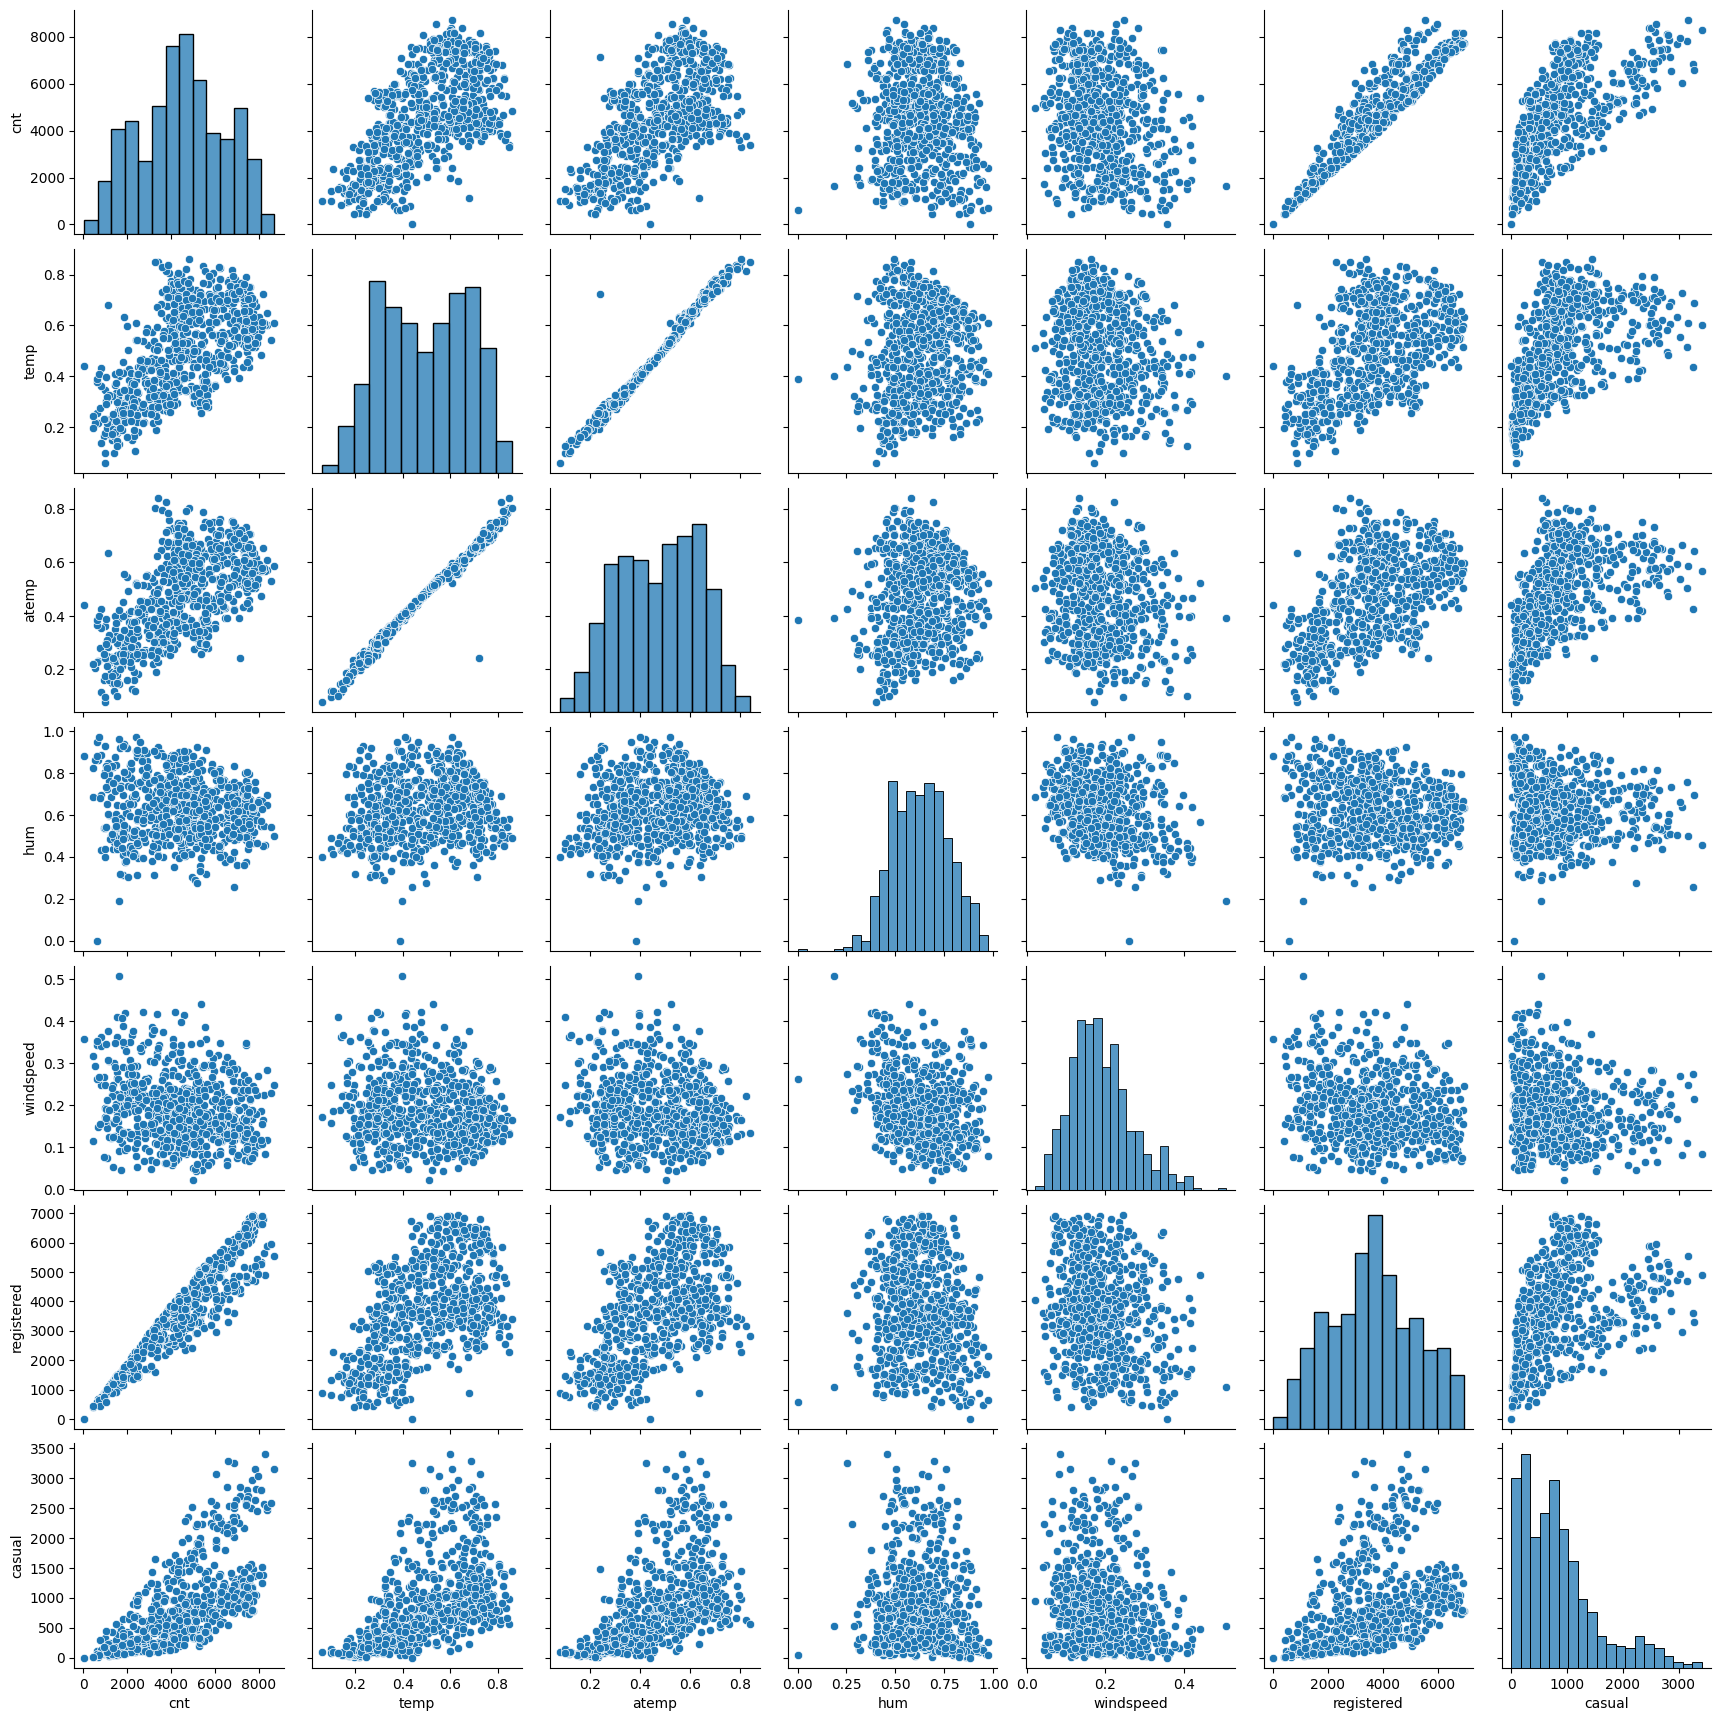

In [98]:
sns.pairplot(day_df,vars = ['cnt',"temp",'atemp', "hum",'windspeed','registered','casual'])
plt.show()

**Insight**

Dari penggambaran diatas dapat disimpulkan jika:
*   Jumlah total sepeda berkorelasi dengan Suhu
*   Jumlah total tidak dipengaruhi oleh Kecepatan Angin, Kelembaban


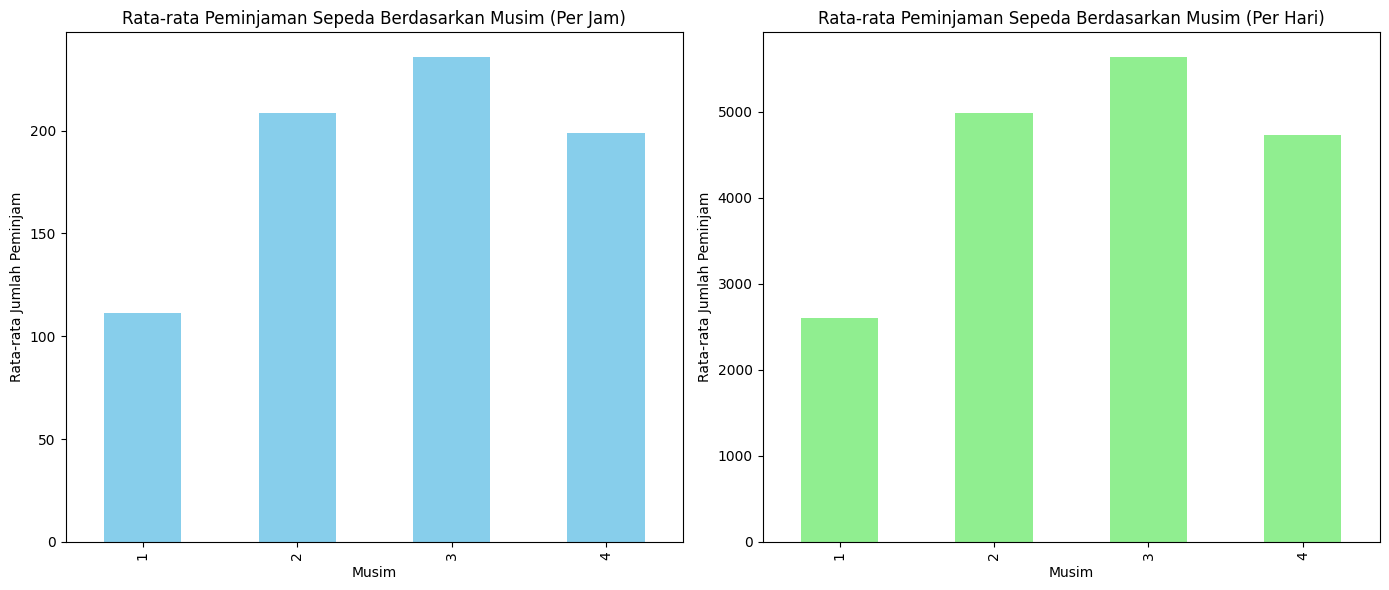

In [99]:
season_avg_hour = hour_df.groupby('season')['cnt'].mean()
season_avg_day = day_df.groupby('season')['cnt'].mean()

# Membuat subplot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Visualisasi pengaruh musim (Per Jam) di subplot kiri
season_avg_hour.plot(kind='bar', color='skyblue', ax=axes[0])
axes[0].set_title('Rata-rata Peminjaman Sepeda Berdasarkan Musim (Per Jam)')
axes[0].set_xlabel('Musim')
axes[0].set_ylabel('Rata-rata Jumlah Peminjam')

# Visualisasi pengaruh musim (Per Hari) di subplot kanan
season_avg_day.plot(kind='bar', color='lightgreen', ax=axes[1])
axes[1].set_title('Rata-rata Peminjaman Sepeda Berdasarkan Musim (Per Hari)')
axes[1].set_xlabel('Musim')
axes[1].set_ylabel('Rata-rata Jumlah Peminjam')

plt.tight_layout()
plt.show()

**Insight**
- Jumlah peminjam sepeda secara signifikan dipengaruhi oleh musim. Pada musim panas (season 2) dan musim gugur (season 3), jumlah peminjam sepeda meningkat, yang menunjukkan bahwa cuaca yang lebih hangat cenderung mendorong lebih banyak orang untuk menggunakan sepeda. Sebaliknya, pada musim dingin (season 1), peminjaman sepeda cenderung menurun

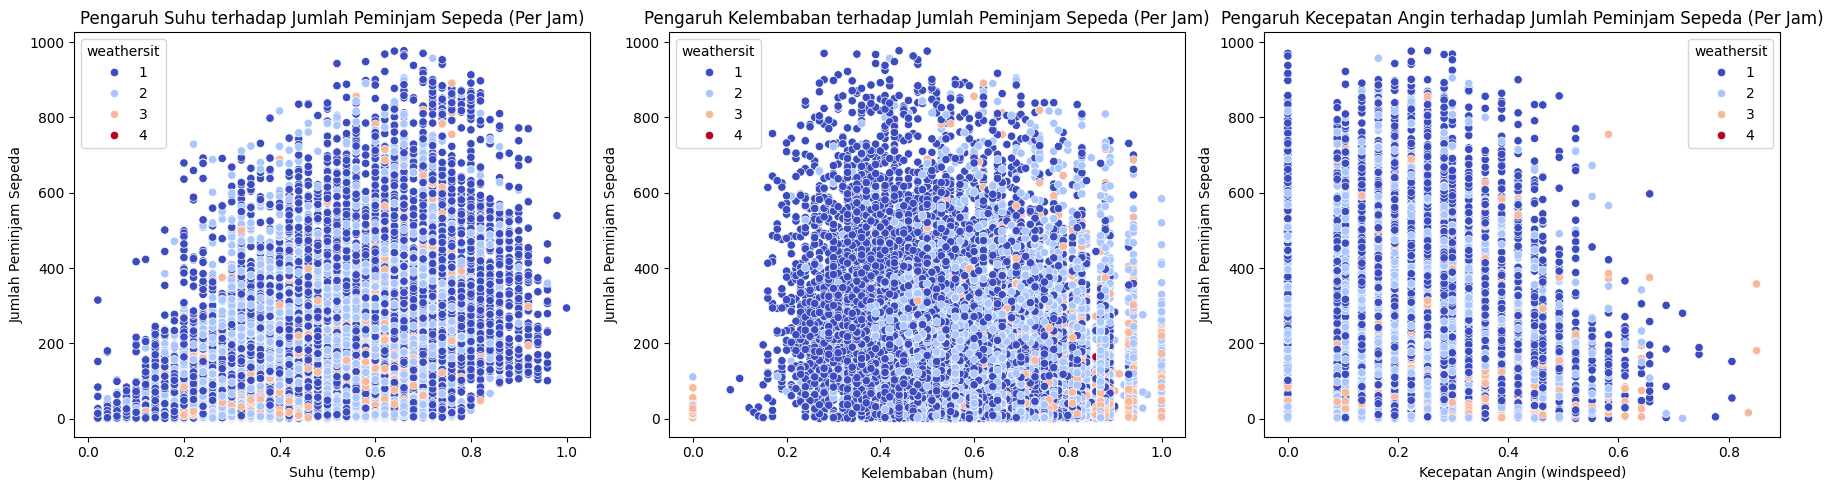

In [100]:
plt.figure(figsize=(18, 5))

# Hubungan antara cuaca dan peminjaman (Suhu)
plt.subplot(1, 3, 1)
sns.scatterplot(x='temp', y='cnt', data=hour_df, hue='weathersit', palette='coolwarm')
plt.title('Pengaruh Suhu terhadap Jumlah Peminjam Sepeda (Per Jam)')
plt.xlabel('Suhu (temp)')
plt.ylabel('Jumlah Peminjam Sepeda')

# Hubungan antara kelembaban dan peminjaman
plt.subplot(1, 3, 2)
sns.scatterplot(x='hum', y='cnt', data=hour_df, hue='weathersit', palette='coolwarm')
plt.title('Pengaruh Kelembaban terhadap Jumlah Peminjam Sepeda (Per Jam)')
plt.xlabel('Kelembaban (hum)')
plt.ylabel('Jumlah Peminjam Sepeda')

# Hubungan antara kecepatan angin dan peminjaman
plt.subplot(1, 3, 3)
sns.scatterplot(x='windspeed', y='cnt', data=hour_df, hue='weathersit', palette='coolwarm')
plt.title('Pengaruh Kecepatan Angin terhadap Jumlah Peminjam Sepeda (Per Jam)')
plt.xlabel('Kecepatan Angin (windspeed)')
plt.ylabel('Jumlah Peminjam Sepeda')

plt.tight_layout()
plt.show()


**Insight**

- Terdapat korelasi positif antara suhu (temp) dan jumlah peminjam sepeda, yang berarti semakin hangat suhu, semakin banyak orang yang menggunakan sepeda.
Kelembaban: Ada korelasi negatif antara kelembaban (hum) dan peminjaman sepeda. Saat kelembaban meningkat, jumlah peminjam sepeda menurun, mungkin karena tingkat kenyamanan yang lebih rendah.
Kecepatan Angin: Kecepatan angin juga mempengaruhi jumlah peminjam sepeda. Pada kecepatan angin yang lebih tinggi, jumlah peminjam cenderung berkurang, mungkin karena bersepeda menjadi lebih sulit di kondisi angin yang kencang.

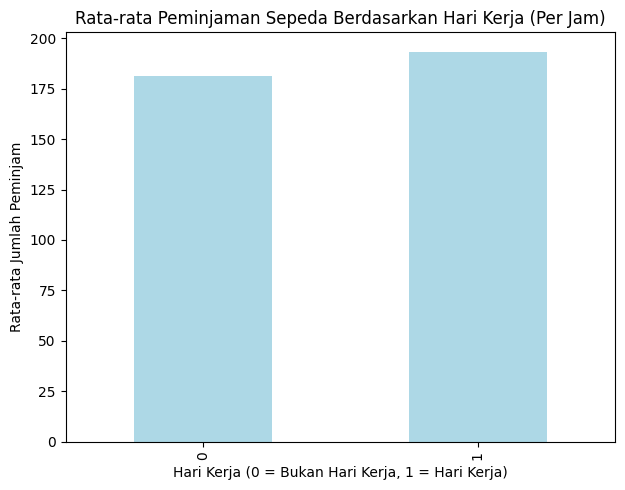

In [101]:
# Rata-rata peminjaman berdasarkan hari libur (Per Jam)
holiday_avg_hour = hour_df.groupby('holiday')['cnt'].mean()

# Rata-rata peminjaman berdasarkan hari kerja (Per Jam)
workingday_avg_hour = hour_df.groupby('workingday')['cnt'].mean()
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 2)
workingday_avg_hour.plot(kind='bar', color='lightblue')
plt.title('Rata-rata Peminjaman Sepeda Berdasarkan Hari Kerja (Per Jam)')
plt.xlabel('Hari Kerja (0 = Bukan Hari Kerja, 1 = Hari Kerja)')
plt.ylabel('Rata-rata Jumlah Peminjam')

plt.tight_layout()
plt.show()

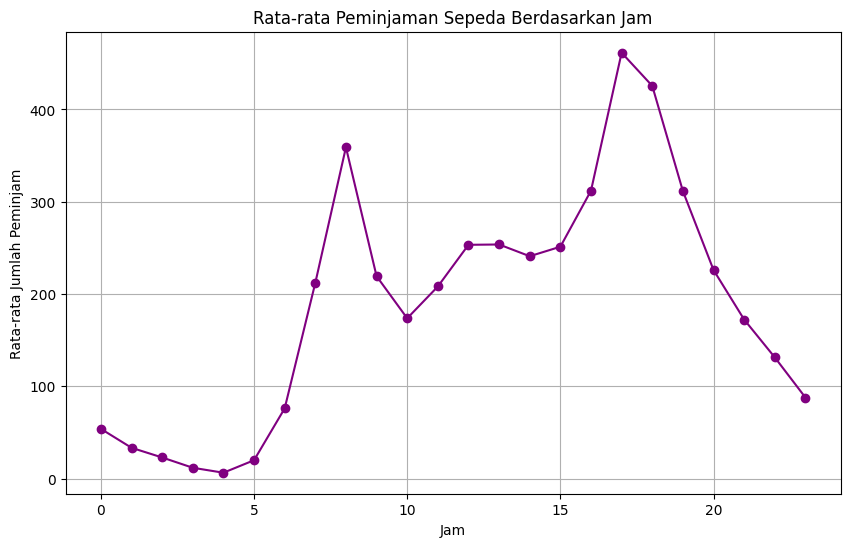

In [102]:
# Rata-rata peminjaman per jam
hour_avg = hour_df.groupby('hr')['cnt'].mean()

plt.figure(figsize=(10,6))
hour_avg.plot(kind='line', marker='o', color='purple')
plt.title('Rata-rata Peminjaman Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Peminjam')
plt.grid(True)
plt.show()

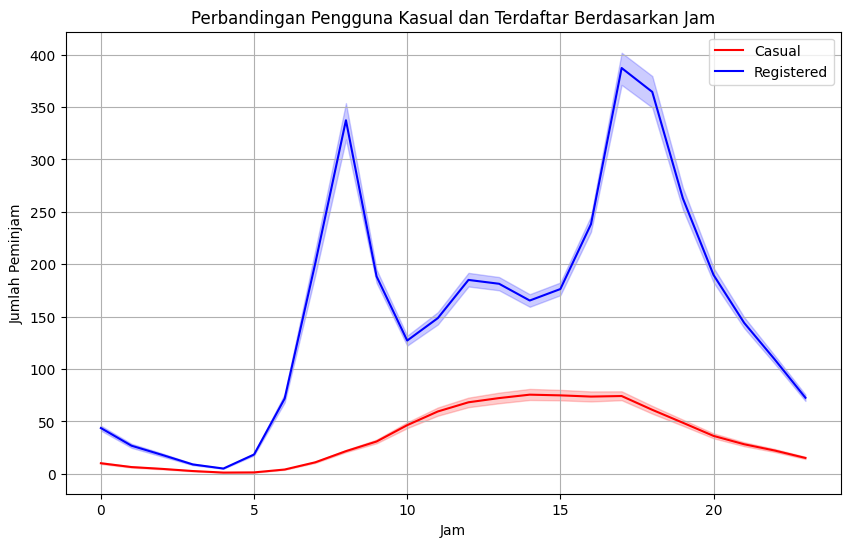

In [103]:
# Membandingkan pengguna kasual dan terdaftar
plt.figure(figsize=(10,6))
sns.lineplot(x='hr', y='casual', data=hour_df, label='Casual', color='red')
sns.lineplot(x='hr', y='registered', data=hour_df, label='Registered', color='blue')
plt.title('Perbandingan Pengguna Kasual dan Terdaftar Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Peminjam')
plt.legend()
plt.grid(True)
plt.show()

**Insight**

Pengguna registered lebih banyak mendominasi peminjaman sepeda

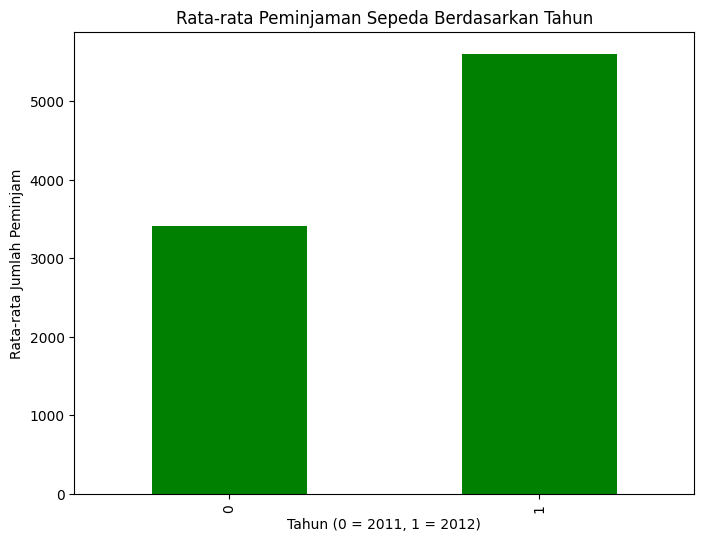

In [104]:
# Tren peminjaman sepeda berdasarkan tahun
year_avg_day = day_df.groupby('yr')['cnt'].mean()

plt.figure(figsize=(8,6))
year_avg_day.plot(kind='bar', color='green')
plt.title('Rata-rata Peminjaman Sepeda Berdasarkan Tahun')
plt.xlabel('Tahun (0 = 2011, 1 = 2012)')
plt.ylabel('Rata-rata Jumlah Peminjam')
plt.show()

**Insight**

Terjadi peningkatan jumlah peminjaman sepeda dari tahun 2011 ke tahun 2012

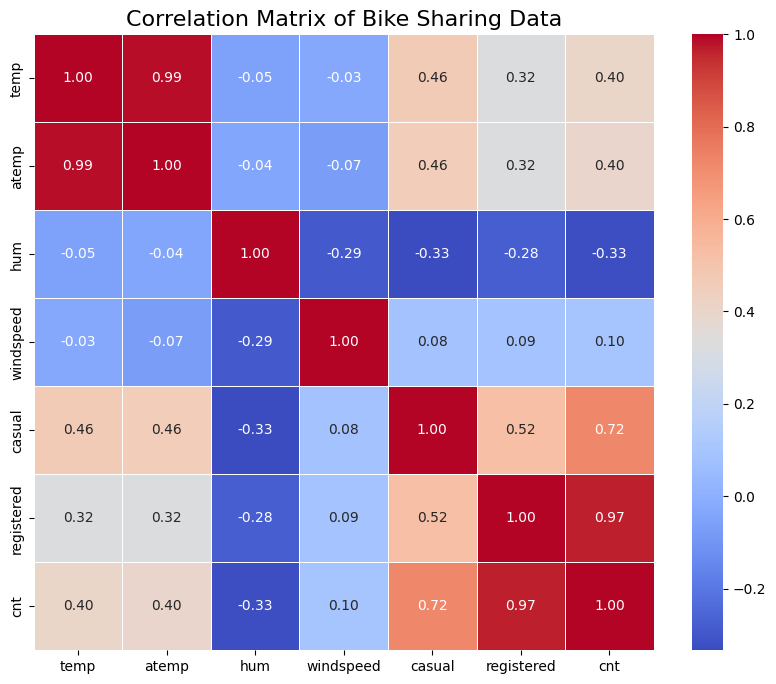

In [105]:
corr_matrix = hour_cleaned[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].corr()

# Visualisasi heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix of Bike Sharing Data', fontsize=16)
plt.show()


## Visualization & Explanatory Analysis

### Pertanyaan 1:

Apakah ada tren peningkatan penggunaan sepeda pada musim tertentu dalam setahun?

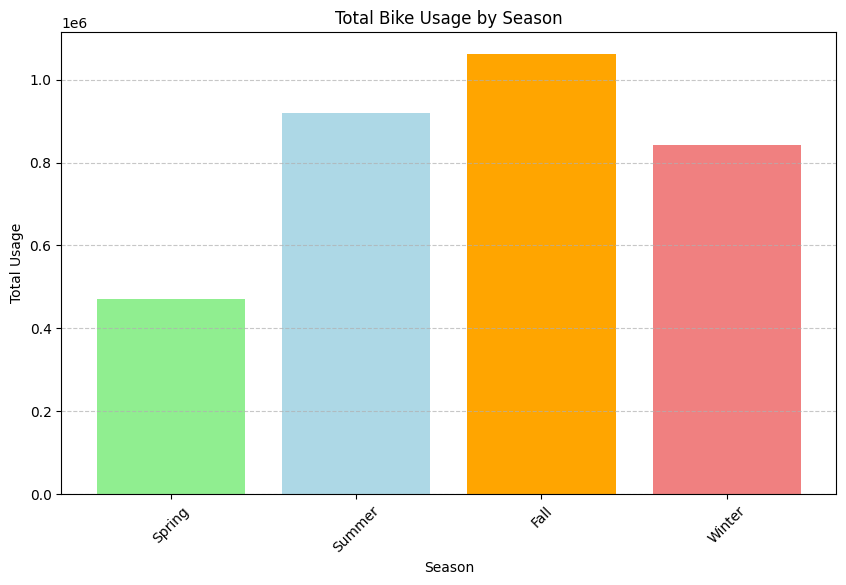

   season      cnt
0  Spring   471348
1  Summer   918589
2    Fall  1061129
3  Winter   841613


In [106]:
seasonal_usage = day_df.groupby('season')['cnt'].sum().reset_index()

seasonal_usage['season'] = seasonal_usage['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

# Membuat visualisasi
plt.figure(figsize=(10, 6))
plt.bar(seasonal_usage['season'], seasonal_usage['cnt'], color=['lightgreen', 'lightblue', 'orange', 'lightcoral'])
plt.title('Total Bike Usage by Season')
plt.xlabel('Season')
plt.ylabel('Total Usage')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Menampilkan hasil
print(seasonal_usage)

### Pertanyaan 2:

Jam berapa penggunaan sepeda paling tinggi dalam sehari?

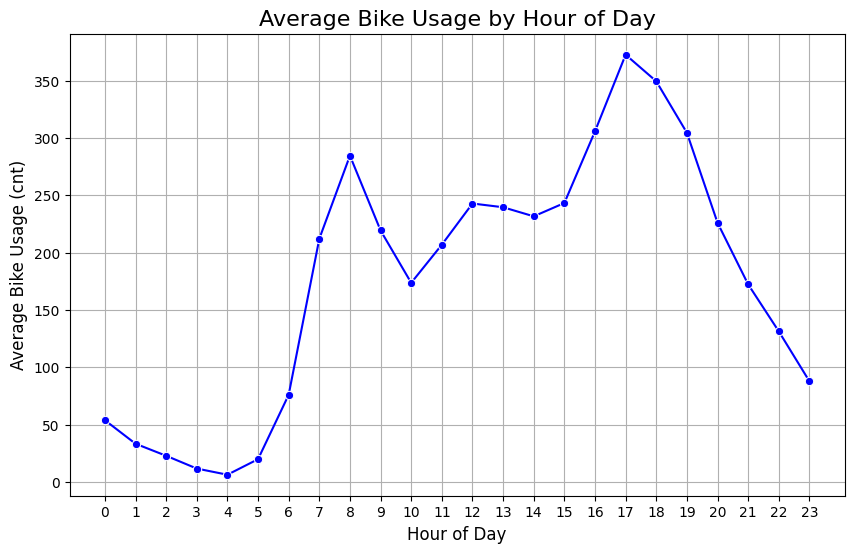

In [107]:
hourly_usage = hour_cleaned.groupby('hr')['cnt'].mean().reset_index()

# Visualisasi penggunaan sepeda berdasarkan waktu (jam)
plt.figure(figsize=(10, 6))
sns.lineplot(x='hr', y='cnt', data=hourly_usage, marker='o', color='b')
plt.title('Average Bike Usage by Hour of Day', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Average Bike Usage (cnt)', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

**Insight:**
- Dari visualisasi pertanyaan 1, kita dapat melihat tren peningkatan penggunaan sepeda berdasarkan musim. Jika penggunaan sepeda lebih tinggi di musim panas dan musim gugur hal ini menunjukkan bahwa cuaca yang lebih hangat cenderung mendorong lebih banyak orang untuk menggunakan sepeda. Sebaliknya, penggunaan sepeda mungkin lebih rendah di musim dingin, karena cuaca dingin bisa menjadi penghalang

- Visualisasi untuk pertanyaan 2 menunjukkan pola penggunaan sepeda berdasarkan waktu. Terdapat dua puncak besar:
Pagi hari (sekitar jam 8), yang menunjukkan bahwa banyak orang menggunakan sepeda untuk pergi bekerja.
Sore hari (sekitar jam 17-18), saat orang pulang kerja.
Hal ini menunjukkan bahwa penggunaan sepeda paling tinggi terjadi selama jam sibuk pagi dan sore hari, yang menandakan sepeda digunakan sebagai moda transportasi untuk bekerja

## Analisis Lanjutan (Opsional)

**Clustering**

   hr  hour_category  cnt
0   0  Non-Rush Hour   16
1   1  Non-Rush Hour   40
2   2  Non-Rush Hour   32
3   3  Non-Rush Hour   13
4   4  Non-Rush Hour    1
                 mean_cnt  total_cnt
hour_category                       
Non-Rush Hour  141.713221    1843689
Rush Hour      331.652552    1448990


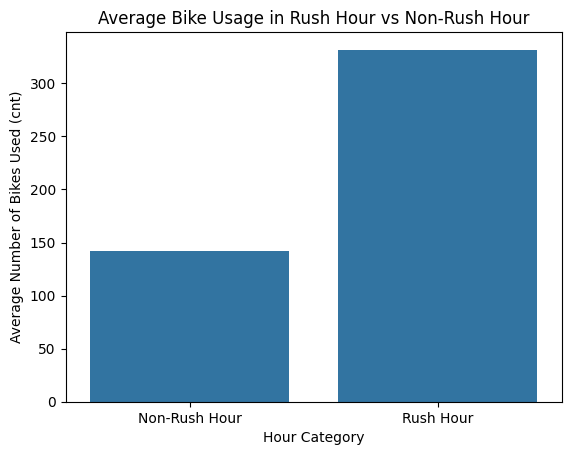

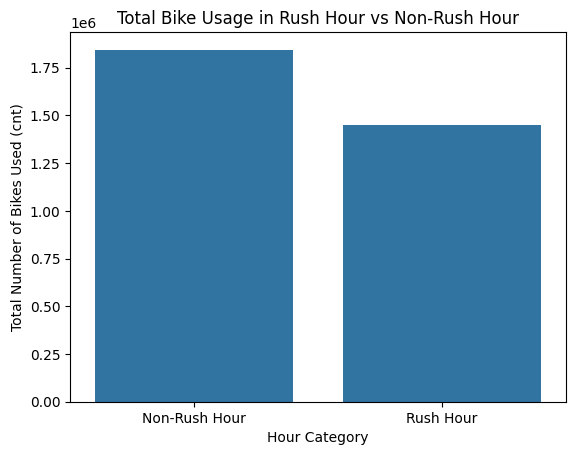

In [108]:
# Definisi jam sibuk (rush hour) dan non-sibuk
def categorize_hour(hour):
    if 7 <= hour <= 9 or 16 <= hour <= 18:
        return 'Rush Hour'
    else:
        return 'Non-Rush Hour'

hour_df['hour_category'] = hour_df['hr'].apply(categorize_hour)

print(hour_df[['hr', 'hour_category', 'cnt']].head())
grouped = hour_df.groupby('hour_category').agg({
    'cnt': ['mean', 'sum']
})
grouped.columns = ['mean_cnt', 'total_cnt']
print(grouped)

grouped = grouped.reset_index()

sns.barplot(x='hour_category', y='mean_cnt', data=grouped)
plt.title('Average Bike Usage in Rush Hour vs Non-Rush Hour')
plt.xlabel('Hour Category')
plt.ylabel('Average Number of Bikes Used (cnt)')
plt.show()

sns.barplot(x='hour_category', y='total_cnt', data=grouped)
plt.title('Total Bike Usage in Rush Hour vs Non-Rush Hour')
plt.xlabel('Hour Category')
plt.ylabel('Total Number of Bikes Used (cnt)')
plt.show()

**Insight**

- Total Count, non-Rush Hour mencakup lebih banyak jam, sehingga meskipun penggunaan per jam lebih rendah, totalnya lebih besar. Sementara Rush Hour hanya berlangsung singkat, jadi totalnya bisa lebih kecil meski penggunaan per jam lebih tinggi.

- Average Count, selama Rush Hour, lebih banyak sepeda digunakan per jam karena banyak orang bepergian. Di Non-Rush Hour, penggunaan per jam lebih sedikit karena aktivitas yang lebih rendah.








In [109]:
def categorize_weather(weather):
    if weather == 1:
        return 'Clear'
    elif weather == 2:
        return 'Cloudy'
    elif weather == 3:
        return 'Rainy'
    else:
        return 'Severe'

hour_df['weather_category'] = hour_df['weathersit'].apply(categorize_weather)

print(hour_df[['weathersit', 'weather_category', 'cnt']].head())

grouped_weather = hour_df.groupby('weather_category').agg({
    'cnt': ['mean', 'sum']
})
print(grouped_weather)

   weathersit weather_category  cnt
0           1            Clear   16
1           1            Clear   40
2           1            Clear   32
3           1            Clear   13
4           1            Clear    1
                         cnt         
                        mean      sum
weather_category                     
Clear             204.869272  2338173
Cloudy            175.165493   795952
Rainy             111.579281   158331
Severe             74.333333      223


## Conclusion

- Penggunaan sepeda cenderung meningkat selama musim panas dan musim gugur, sementara menurun di musim dingin
- Penggunaan sepeda tertinggi terjadi pada jam-jam sibuk dimulai dari jam 8 pagi sampai jam 18.00 sore hari yang mana jam 17.00 merupakan titik puncak, kemungkinan karena banyak pengguna yang menggunakan sepeda untuk bekerja

In [110]:
with open('dashboard.py', 'w') as f:
    f.write("""
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('main_data.csv')

# Title
st.title("Bike Sharing Data Analysis")

# Pilihan visualisasi
visual_choice = st.sidebar.selectbox("Pilih Visualisasi", ["Pengaruh Suhu terhadap Penyewaan", "Jumlah Penyewaan per Jam"])

# Visualisasi 1: Pengaruh Suhu terhadap Jumlah Penyewaan
if visual_choice == "Pengaruh Suhu terhadap Penyewaan":
    st.header("Pengaruh Suhu terhadap Jumlah Penyewaan")
    fig, ax = plt.subplots()
    sns.scatterplot(x='temp', y='cnt', data=data, ax=ax)
    st.pyplot(fig)

# Visualisasi 2: Jumlah Penyewaan per Jam
if visual_choice == "Jumlah Penyewaan per Jam":
    st.header("Jumlah Penyewaan per Jam")
    fig, ax = plt.subplots()
    sns.barplot(x='hr', y='cnt', data=data, ax=ax)
    st.pyplot(fig)
    """)


In [111]:
from google.colab import files
files.download('dashboard.py')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>